# Creating networks with NetworkX
<a href = https://networkx.github.io/documentation/stable/index.html>https://networkx.github.io/documentation/stable/index.html </a>

In [1]:
import networkx as nx

### Creating our fisrt graph
use `nx.Graph()` to create a networkX  Graph.  A networkX  Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [2]:
G=nx.Graph()

### Adding our first edge (and nodes)
use `nx.Graph().add_edge()` to add one edge at a time

In [3]:
G.add_edge(0,1)

`G.nodes`, `G.edges`, are set-like views of the nodes, edges in a graph. They offer a continually updated read-only view into the graph structure. They are also dict-like in that you can look up node and edge data attributes via the views and iterate with data attributes using methods `.items()`, `.data()`. 

In [4]:
G.edges.data()

EdgeDataView([(0, 1, {})])

In [6]:
G.edges(data= True)

EdgeDataView([(0, 1, {})])

In [7]:
G.nodes

NodeView((0, 1))

In [8]:
# get a list of edges
edges = list(G.edges)
edges

[(0, 1)]

In [9]:
# get a ditionary of edges
edges = dict(G.edges)
edges

{(0, 1): {}}

In [10]:
# get a list of nodes
nodes = list(G.nodes)
nodes

[0, 1]

### Adding a node
use `nx.Graph().add_node()` to add one node at a time


In [11]:
G.add_node(2)

In [12]:
G.nodes

NodeView((0, 1, 2))

In [13]:
# the edges stay the same
G.edges

EdgeView([(0, 1)])

### Adding a list of edges
use `nx.Graph().add_edges_from()` to add multiple edges. This method will take any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g., (2, 3, {'weight': 3.1415}).

In [14]:
G.add_edges_from([(1, 2), (1, 3)])

In [15]:
G.edges

EdgeView([(0, 1), (1, 2), (1, 3)])

In [16]:
G.nodes

NodeView((0, 1, 2, 3))

### Adding a list of nodes
use `nx.Graph().add_edges_from()` to add a list of nodes

In [17]:
G.add_nodes_from([2, 3])

In [18]:
# when adding nodes that already exist networkx will ignore the addition
G.nodes

NodeView((0, 1, 2, 3))

In [19]:
# add a range of nodes
G.add_nodes_from(range(4,9))

In [20]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8))

In [21]:
# the edges stay the same
G.edges

EdgeView([(0, 1), (1, 2), (1, 3)])

### The number of nodes and edges in the graph

use `nx.Graph().number_of_nodes()` and `nx.Graph().number_of_edges()` to get the number of nodes and edges in the graph

In [22]:
G.number_of_nodes()

9

In [23]:
G.number_of_edges()

3

### Neighbors
use `nx.Graph().adj` to get each node's neighbors. like `G.nodes`, `G.edges`, `G.adj` and `G.degree` are set-like views of the neighbors and degrees in a graph. They offer a continually updated read-only view into the graph structure. 

In [24]:
G.adj.items()

ItemsView(AdjacencyView({0: {1: {}}, 1: {0: {}, 2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}}))

In [25]:
# node 1 is a neighbor of node 0
G.adj[0]

AtlasView({1: {}})

In [26]:
# print all the neighbors of all the nodes in a readable manner:
# nodes 0, 2, 3 are neighboes of 1
for i in G.adj:
    print(i, G[i])

0 {1: {}}
1 {0: {}, 2: {}, 3: {}}
2 {1: {}}
3 {1: {}}
4 {}
5 {}
6 {}
7 {}
8 {}


In [27]:
# the list of neighbors:
for i in G.adj:
    print(i, list(G[i]))

0 [1]
1 [0, 2, 3]
2 [1]
3 [1]
4 []
5 []
6 []
7 []
8 []


In [27]:
list(G.adj.items())

[(0, AtlasView({1: {}})),
 (1, AtlasView({0: {}, 2: {}, 3: {}})),
 (2, AtlasView({1: {}})),
 (3, AtlasView({1: {}})),
 (4, AtlasView({})),
 (5, AtlasView({})),
 (6, AtlasView({})),
 (7, AtlasView({})),
 (8, AtlasView({}))]

You can also use `G.adjacency()` note that for undirected graphs - each edge appears twice

In [29]:
list(G.adjacency())

[(0, {1: {}}),
 (1, {0: {}, 2: {}, 3: {}}),
 (2, {1: {}}),
 (3, {1: {}}),
 (4, {}),
 (5, {}),
 (6, {}),
 (7, {}),
 (8, {})]

##### use `G.neighbors(node)`  or `(nx.neighbors(G, node)`to get a node's neighbors

In [28]:
list(G.neighbors(1))

[0, 2, 3]

In [29]:
list(nx.neighbors(G, 1))

[0, 2, 3]

##### use `nx.non_neighbors(G, node)`  to get all the nodes that are not neighbors of a node 

In [30]:
list(nx.non_neighbors(G, 1))

[4, 5, 6, 7, 8]

##### use `nx.common_neighbors(G, node1, node2)` to get the common neighbors of two nodes

In [32]:
# node 1 if a neighbor of both node 2 and 3
list(nx.common_neighbors(G, 2, 3))

[1]

##### using subscript notation:

In [33]:
G[1]

AtlasView({0: {}, 2: {}, 3: {}})

In [34]:
# an empty dict if there are no attributes
G[1][0]

{}

In [36]:
G.edges[1,2]

{}

### Adding attributes
attributes can be added using subscript notation, for example:<br/>
`G[0][1]['color'] = 'green'`<br/>
`G.edges[1, 2]['color'] = "red"`

In [37]:
G[0][1]['relation'] = 'friend'
G.edges[1, 2]['relation'] = "family"

In [38]:
G[1]

AtlasView({0: {'relation': 'friend'}, 2: {'relation': 'family'}, 3: {}})

In [39]:
G[0][1]

{'relation': 'friend'}

##### use `G.edges.data(attribute)` to access edges attribute

In [41]:
G.edges.data('relation')

EdgeDataView([(0, 1, 'friend'), (1, 2, 'family'), (1, 3, None)])

In [42]:
G[0][1]['score'] = 9

In [43]:
G.adj

AdjacencyView({0: {1: {'relation': 'friend', 'score': 9}}, 1: {0: {'relation': 'friend', 'score': 9}, 2: {'relation': 'family'}, 3: {}}, 2: {1: {'relation': 'family'}}, 3: {1: {}}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}})

##### adding nodes and edges with attributes
use a list of 2-tuple of nodes followed by an attribute dictionary, e.g., (10, {'weight': 3.1415})
to add multiple nodes with attributes. for example: <br/>
`G.add_nodes_from([(10, {'name' : 'Joe'}),`<br/>
                 `(11, {'name' : 'Jack'}),`<br/>
                 `(12, {'name' : 'Jill'})])`<br/>

In [44]:
G.add_nodes_from([(10, {'name' : 'Joe'}),
                 (11, {'name' : 'Jack'}),
                 (12, {'name' : 'Jill'})])

In [45]:
G.nodes.data()

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 10: {'name': 'Joe'}, 11: {'name': 'Jack'}, 12: {'name': 'Jill'}})

In [46]:
G.nodes[10]['name']

'Joe'

##### adding multiple edges with a common attribute
 `G.add_edges_from([(11, 10), (10, 12)], status='friends')`

In [47]:
G.add_edges_from([(11, 10), (10, 12)], status='friends')

In [48]:
G.edges.data()

EdgeDataView([(0, 1, {'relation': 'friend', 'score': 9}), (1, 2, {'relation': 'family'}), (1, 3, {}), (10, 11, {'status': 'friends'}), (10, 12, {'status': 'friends'})])

In [49]:
G[10][12]['status'] = 'family'

In [50]:
G.edges.data()

EdgeDataView([(0, 1, {'relation': 'friend', 'score': 9}), (1, 2, {'relation': 'family'}), (1, 3, {}), (10, 11, {'status': 'friends'}), (10, 12, {'status': 'family'})])

##### adding multiple edges with different attributes:
`G.add_edges_from([(11, 12, {'status': 'family',`<br/>
                         `  'color':'yellow'}), `<br/>
                 ` (2, 3, {'weight': 8})])`<br/>

In [51]:
G.add_edges_from([(11, 12, {'status': 'family',
                           'color':'yellow'}), 
                  (2, 3, {'weight': 8})])

In [52]:
G.edges.data()

EdgeDataView([(0, 1, {'relation': 'friend', 'score': 9}), (1, 2, {'relation': 'family'}), (1, 3, {}), (2, 3, {'weight': 8}), (10, 11, {'status': 'friends'}), (10, 12, {'status': 'family'}), (11, 12, {'status': 'family', 'color': 'yellow'})])

### Degree
use `G.degree` to show the degrees of all the nodes in the graph, use subscript notation to access a specific node's degree

In [53]:
G.degree

DegreeView({0: 1, 1: 3, 2: 2, 3: 2, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 10: 2, 11: 2, 12: 2})

In [54]:
G.degree[1]

3

In [55]:
[(i, G.degree[i]) for i in G.adj]


[(0, 1),
 (1, 3),
 (2, 2),
 (3, 2),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (10, 2),
 (11, 2),
 (12, 2)]

In [56]:
G.degree(range(3))

DegreeView({0: 1, 1: 3, 2: 2})

In [57]:
G.degree()

DegreeView({0: 1, 1: 3, 2: 2, 3: 2, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 10: 2, 11: 2, 12: 2})

### Before we remove nodes lets plot our network

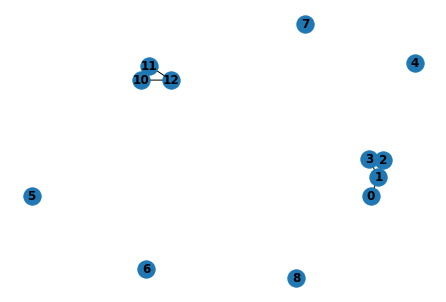

In [59]:
nx.draw(G, with_labels=True, font_weight='bold')

### Removing nodes and edges
use `G.remove_node(node)` to remove a single node


In [60]:
##remove node 3
G.remove_node(3)

In [61]:
##list the neighbors of node 1
list(G.neighbors(1))

[0, 2]

use `G.remove_nodes_from(list of nodes)` to remove multiple nodes

In [62]:
G.remove_nodes_from(range(5,9))

In [63]:
G.degree()

DegreeView({0: 1, 1: 2, 2: 1, 4: 0, 10: 2, 11: 2, 12: 2})

In [64]:
G.edges

EdgeView([(0, 1), (1, 2), (10, 11), (10, 12), (11, 12)])

use `G.remove_edge(edge)` to remove a single edge
for example : `G.remove_edge(0, 1)`

In [65]:
G.remove_edge(0, 1)

In [66]:
G.nodes

NodeView((0, 1, 2, 4, 10, 11, 12))

use `G.remove_edges_from(list of edges )` to remove a single edge
for example : `G.remove_edges_from([(0, 1), (1,2)])`

In [67]:
G.remove_edges_from([(0, 1), (1,2)])

In [68]:
G.edges

EdgeView([(10, 11), (10, 12), (11, 12)])

In [69]:
G.nodes

NodeView((0, 1, 2, 4, 10, 11, 12))

In [70]:
G.degree()

DegreeView({0: 0, 1: 0, 2: 0, 4: 0, 10: 2, 11: 2, 12: 2})

use `G.clear` to remove all the nodes and edges in the network

In [71]:
G.clear()

<p style = "color:blue">We now have a null graph!</p>


In [72]:
print(G.edges, G.nodes)

[] []


## Exercise

<h3 style="color:red">Creating graphs using networkX</h3>
<ol>
    <li>Create an undirected graph using the example graph used in class ( <a href = "https://docs.google.com/presentation/d/1D8F5qr_OH92zmD_H0j14t03pZKA9SsxtjDhfAXebCdk/edit?usp=sharing"> https://docs.google.com/presentation/d/1D8F5qr_OH92zmD_H0j14t03pZKA9SsxtjDhfAXebCdk/edit?usp=sharing </a>)
    </li>
    <li>What is the largest node degree in the graph?
    </li>
    <li>What is the smallest node degree in the graph?
    </li>
    <li>What are the common neighbors of node 1 and 2?
    </li>
    <li>What nodes are not neighbors of node 5?
    </li>
    <li>What is the sum of the degrees in the graph?
    </li>
    <li>What is the size in the graph?
    </li>
    <li>What is the order in the graph?
    </li>
    <li>Modify the graph such that all of its components are connected
    </li>
</ol>

present the answers in code

In [73]:
G = nx.Graph()

In [74]:
G.add_edges_from([(0,3), (0,2), (0,1), (1,2), (2,5), (4,6), (5,7), (7,8)])

In [75]:
G.edges

EdgeView([(0, 3), (0, 2), (0, 1), (2, 1), (2, 5), (5, 7), (4, 6), (7, 8)])

In [76]:
G.nodes

NodeView((0, 3, 2, 1, 5, 4, 6, 7, 8))

In [77]:
G.adj

AdjacencyView({0: {3: {}, 2: {}, 1: {}}, 3: {0: {}}, 2: {0: {}, 1: {}, 5: {}}, 1: {0: {}, 2: {}}, 5: {2: {}, 7: {}}, 4: {6: {}}, 6: {4: {}}, 7: {5: {}, 8: {}}, 8: {7: {}}})

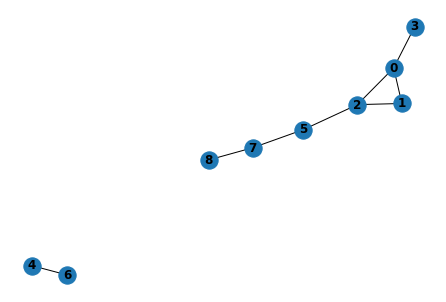

In [78]:
nx.draw(G, with_labels=True, font_weight='bold')

In [79]:
# maximum degree in the graph
max(dict(G.degree).values())

3

In [80]:
# sum of degrees in the graph
sum(dict(G.degree).values())

16

In [81]:
# number of edges
nx.number_of_edges(G)

8

In [82]:
# neighbord of node 5
list(G.neighbors(5))

[2, 7]

In [83]:
# add an edge between nodes 8 and 4
G.add_edge(8,4)

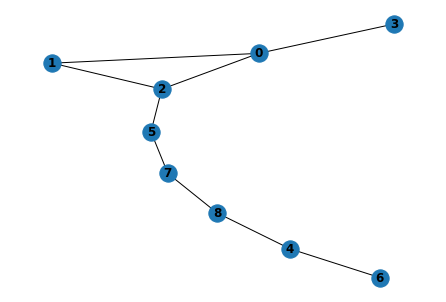

In [84]:
nx.draw(G, with_labels=True, font_weight='bold')

### Creating a directed graph
The DiGraph class provides additional properties specific to directed edges, e.g., `DiGraph.out_edges()`, `DiGraph.in_degree()`, `DiGraph.predecessors()`, `DiGraph.successors()` etc. To allow algorithms to work with both classes easily, the directed versions of `neighbors()` is equivalent to `successors()` while degree reports the sum of in_degree and out_degree.

## Exercise

<h3 style="color:red">Creating directed networks using networkX</h3>
<ol>
    <li>Create a directed graph using the exaple graph used in class
    </li>
    
</ol>

present the answers in code

In [85]:
DG=nx.DiGraph()
DG.add_edges_from([(0,3), (1,0), (1,2), (2,5),(2,0), (5,7), (8,7), (6,4)])

In [86]:
DG.edges

OutEdgeView([(0, 3), (1, 0), (1, 2), (2, 5), (2, 0), (5, 7), (8, 7), (6, 4)])

/home/ml/anaconda3/envs/geoenv4/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


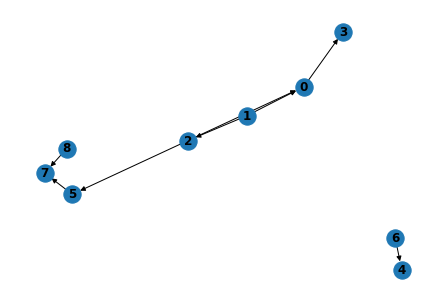

In [87]:
nx.draw(DG, with_labels=True, font_weight='bold')